# FMSF50/MASB13/MASL01 VT-25 Datorlaboration 1: Fördelningar - Python
# 1. Introduktion
## 1.1 Syfte
Syftet med dagens laborationen är att du skall:
* träna på olika sätt att illustrera och beskriva ett datamaterial i Python,
* få förståelse för begreppen täthets- och fördelningsfunktion samt kvantiler,
* träna på att beräkna sannolikheter och kvantiler i Python.

## 1.2 Förberedelser
* Gör *Inför Datorlaboration 1: förberedelser* i Canvas.
* Läs igenom *Python: instruktioner* i Canvas och installera det som eventuellt behövs.
* Öppna denna .ipynb-fil i antingen *Google Colabs* eller *Visual Studio Code*.

### Python-paket
Vi kommer använda följande paket i Python:

* **numpy** Grundläggande linjär algebra och numerik.
* **scipy.stats** För beräkningar av täthets- och fördelningsfunktioner.
* **pandas** För datahantering.
* **matplotlib.pyplot** Grundläggande plot-funktioner.
* **seaborn** Bättre plot-funktioner för pandas-objekt.

Börja med att importera ett antal Python paket (om du inte använder *colabs* kan du behöva installera paketen först).

Kör kodblocket nedan interaktivt med *Execute-Cell*, den lilla *Play*-ikonen till vänster om kodblocket, eller med *Ctrl-Alt-Enter*.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Ladda ner (och upp) lab-filer

Utöver modulerna ovan använder laborationen datamaterialet i **vindelälven_dygn.csv**. För att komma åt data måste du:

* Ladda ner **vindelälven_dygn.csv** från Canvas.
* *Om du använder Colabs*:
    1. Klicka på mappen *Filer* till vänster i *google colab* menyn.
    2. Ladda upp **vindelälven_dygn.csv** genom att klicka på *Ladda upp till sessionens lagringsutrymme* (eller drag-n-drop filen).
* *Om du använder Python lokalt på datorn*:
    1. Lägg **vindelälven_dygn.csv** i samma mapp som denna .ipynb-fil.


# 2. Datamaterialet

Vi har dagliga mätningar av medelvattenflödet (kubikmeter per sekund) i Vindelälven under perioden 1911-1939 och 1980-2022. Glappet i mätningarna är under den period då vattenkraftverken i Luleälven byggdes ut. Vi ska jämföra älvarna i projektet så vi behöver ha samma tidsperioder. Vindelälven är oreglerad och mätningarna är gjorda i Degerfors 1911-1939 respektive Granåker 1980-2022, strax innan den rinner ut i Umeälven (Data hämtade från SMHI).

Läs in datamaterialet som en pandas dataframe med *read_csv()* från pandas-paketet och spara den som objektet **vindeln** och skriv ut det på skärmen:

In [2]:
vindeln = pd.read_csv("vindelälven_dygn.csv")
print(vindeln)

       decimalår    år  flöde
0       0.000000  1911     38
1       0.002740  1911     38
2       0.005479  1911     38
3       0.008219  1911     37
4       0.010959  1911     37
...          ...   ...    ...
26293   0.986301  2022     64
26294   0.989041  2022     63
26295   0.991781  2022     63
26296   0.994521  2022     62
26297   0.997260  2022     62

[26298 rows x 3 columns]


Data består av tre kolumner
* **decimalår** när på året mätningen är gjord (1 januari = 0, 2 januari = 1/365 eller 1/366, etc),
* **år** vilket år mätningen är gjord,
* **flöde** dygnsmedelflödet ($m^3$/s). 

## 2.1 Enkel sammanfattning
Vi kan få lite sammanfattande beräkningar genom att lägga till pandas-funktionen *.describe()* till dataframen:

In [3]:
print(vindeln.describe())

          decimalår            år         flöde
count  26298.000000  26298.000000  26298.000000
mean       0.498631   1970.388927    184.438018
std        0.288680     38.853811    191.191834
min        0.000000   1911.000000     15.000000
25%        0.249315   1928.250000     54.000000
50%        0.498630   1986.500000    118.000000
75%        0.747945   2004.000000    240.000000
max        0.997268   2022.000000   1799.000000


**Mozquizto 1:** Hur många mätningar har vi och hur stort var minsta respektive största dygnsflödet?

## 2.2 Histogram etc

En god regel när man står inför ett nytt datamaterial är att rita upp det på några olika sätt. Vi börjar med ett histogram med *histplot()* från **seaborn**, titta först på hjälptexten för att förstå hur funktionen fungerar:

In [4]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

Vi använder nu funktionen för att göra ett histogram över flödet:

<Axes: xlabel='flöde', ylabel='Count'>

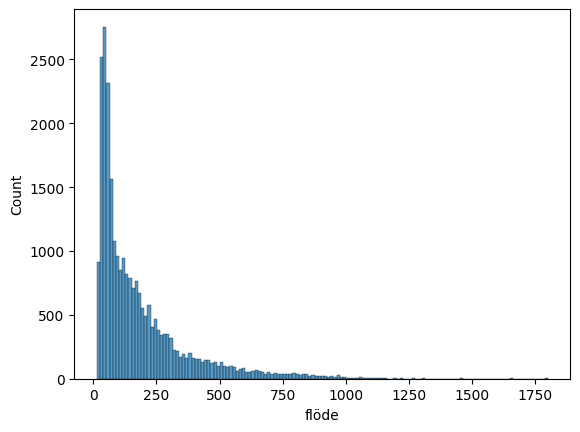

In [5]:
sns.histplot(vindeln, x = "flöde")

Vi kan också plotta data som en funktion av index (dvs i tidsordning) i en linjeplot. Här anger **vindeln** vilket datamaterial som ska användas och **x=** och **y=** vilka kolumner i **vindeln** som ska plottas på vilka axlar. Variabeln **vindeln.index** är en inbyggd variabel som anger radnummer (där $0,\dots,n-1$ motsvarar $i=1,\dots,n$).

<Axes: xlabel='None', ylabel='flöde'>

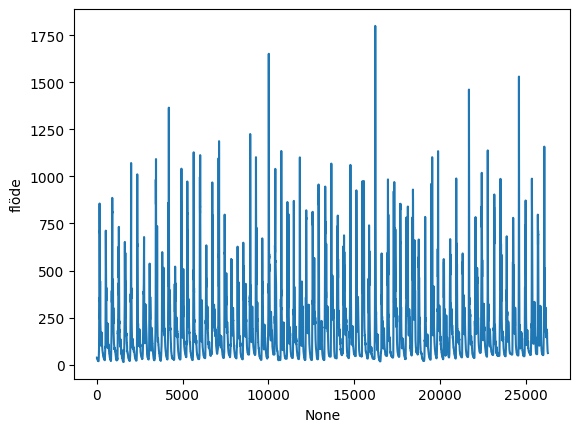

In [6]:
sns.lineplot(vindeln, x = vindeln.index, y = "flöde")

Det ser ut som om det finns periodisk variation. Vi kommer att titta närmare på det senare i laborationen.

För att kunna jämföra figurerna är det bättre att lägga båda i samma figur. Här genererar *plt.subplots()* två delfigurer och **ax=** anger vilken delfigur respektive plot ska hamna i.

<Axes: xlabel='flöde', ylabel='Count'>

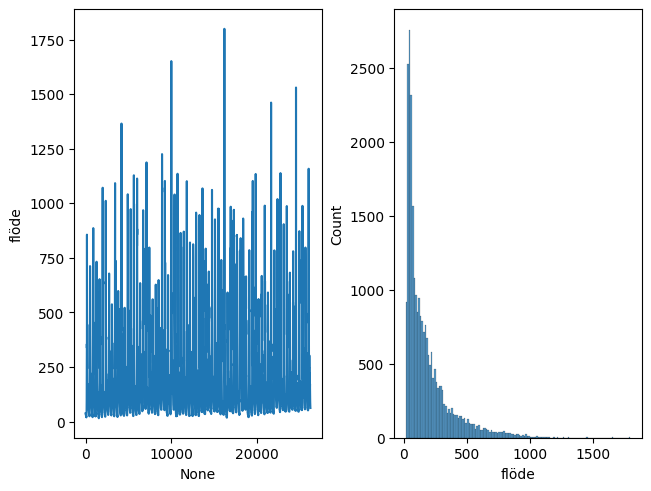

In [7]:
# Ersätt ? med lämpliga saker.
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.lineplot(vindeln, x = vindeln.index, y = "flöde", ax = axs[0])
sns.histplot(vindeln, x = "flöde", ax = axs[1])


**Uppgift:** Jämför lineplot och histogram. Hur hänger de ihop med varandra?

**Uppgift:** Välj ut några datapunkter i den ena figuren och försök hitta dem i den andra.

## 2.3 Empirisk täthets- och fördelningsfunktion

För att enklare kunna jämföra ett histogram med täthetsfunktionen för olika standardfördelningar behöver vi skala om histogrammet så arean blir ett, precis som för en täthetsfunktion.


<Axes: xlabel='flöde', ylabel='Density'>

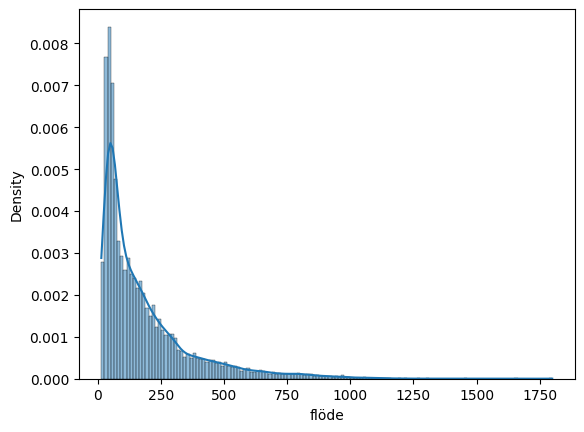

In [8]:
sns.histplot(vindeln, x = "flöde", stat = "density", kde = True)


Här anger **stat** vilken skalning av histogram vi vill ha:
* **count** Antal observationer i varje indelning.
* **frequency** Antalet observationer delat med intervallbredd.
* **probability** eller **proportion** Andel observationer i varje indelning.
* **density** Standardisera så att arean av histogrammet är 1 (dvs täthetsfunktion).

Vi kan också lägga till en skattning av den empiriska täthetsfunktionen med **kde = True**, som anger att en **k**ernal **d**ensity **e**stimation ska ritas in i histogrammet.

**Uppgift:** Testa de olika **stat=** varianterna och se vad som händer. Håll ögonen på skalan på y-axeln

Ett annat sätt att titta på data är att rita en empirisk fördelningsfunktion med *ecdfplot()*, **e**mpirical **c**umulative **d**istribution **f**unction, från **seaborn**.  Vi lägger figurerna bredvid varandra så det är lättare att jämföra dem. Vi lägger också till en grid med *sns.set_style()* så det blir lättare att läsa av.

<Axes: xlabel='flöde', ylabel='Proportion'>

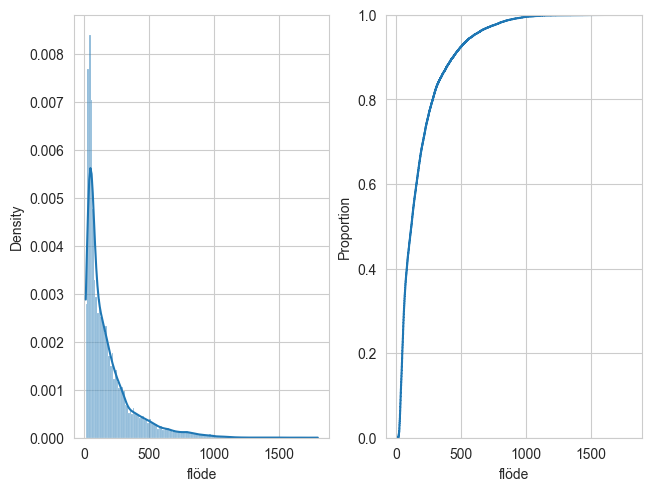

In [9]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.histplot(vindeln, x = "flöde", stat = "density", kde = True, ax = axs[0])
sns.ecdfplot(vindeln, x = "flöde", ax = axs[1])


**Uppgift:** Jämför histogram/täthet och fördelningsfunktion. Hur hänger de ihop med varandra?

I fördelningsfunktionen kan vi avläsa hur stor andel av observationerna som är mindre än eller lika med ett visst tal.

**Mozquizto 2:** Läs av i den empiriska fördelningsfunktionen för att grafiskt uppskatta sannolikheten att ett dygnsflöde är högst ett visst värde, minst ett visst värde och vilket flöde som understigs eller överstigs med en viss sannolikhet.

## 2.4 Empiriska sannolikheter

När antalet observationer i stickprovet ökar kan vi tolka kvoten som sannolikheten att få ett värde mindre än eller lika med $x$. Antalet och kvoten kan beräknas genom summor eller medelvärden av 0/1 där 0 = False = uppfyller inte villkoret och 1 = True = uppfyller villkoret. Observera att beräkningen blir lite mer komplicerad (pandas är inte helt logisk) när vi har två villkor. Vi behöver då använda **vindeln["flöde"]** istället för **vindeln.flöde**. Antalet observationer är sparat som **vindeln.shape[0]**.

In [12]:
gräns1 = 500   # Gräns att understiga
gräns2 = 900   # Gräns att överstiga
gräns3 = 300   # Undre gräns...
gräns4 = 850   # ...och övre gräns att hamna mellan.
print('Antal mindre än', gräns1, ":", np.sum(vindeln.flöde <= gräns1), 'av', vindeln.shape[0])
print('Antal större än', gräns2, ":", np.sum(vindeln.flöde > gräns2), 'av', vindeln.shape[0])
print("Antal mellan", gräns3, "och", gräns4, ":", np.sum((vindeln["flöde"] > gräns3) & (vindeln["flöde"] <= gräns4)), "av", vindeln.shape[0])

print('Andel mindre än', gräns1, ":", np.mean(vindeln.flöde <= gräns1))
print('Andel större än', gräns2, ':', np.mean(vindeln.flöde > gräns2))
print("Andel mellan", gräns3, "och", gräns4, ":", np.mean((vindeln["flöde"] > gräns3) & (vindeln["flöde"] <= gräns4)))

Antal mindre än 500 : 24321 av 26298
Antal större än 900 : 259 av 26298
Antal mellan 300 och 850 : 4385 av 26298
Andel mindre än 500 : 0.9248231804699977
Andel större än 900 : 0.009848657692600198
Andel mellan 300 och 850 : 0.16674271807742033


**Uppgift:** Stämmer det med din uppskattning från figuren?

**Mozquizto 3:** Pröva med några andra värden på $x$.  Hur borde andelen ändra sig när $x$ ökar respektive minskar? Jämför med figuren.

Den omvända proceduren, hitta det värde $x$ som motsvarar en given sannolikhet, dvs en given kvantil, är ofta viktigare.

## 2.5 Empirisk kvantil och percentil
Begreppet **kvantil** är viktigt. Kvantilen kan definieras på olika sätt men vi (och många andra) använder följande definition: kvantilen är det tal $x_{\alpha}$ som uppfyller

$P(X > x_{\alpha}) = \alpha$ dvs $P(X \leq x_{\alpha}) = 1 - \alpha$

där $\alpha$ är ett tal mellan 0 och 1 (vanliga val är: 0.05, 0.01, 0.001).

**Percentilen** definieras istället som det tal $L_p$ som uppfyller $P(X \leq L_p) = p/100$ där $p$ är ett tal mellan 0 och 100.

**Uppgift:** Läs av kvantilen $x_{0.05}$ där $\alpha = 0.05$ ur din figur, med hjälp av definitionen ovan, och genom att pröva dig fram med olika värden på **gräns** och lämpligt håll på olikheten:

In [17]:
gräns = 0.05
print('Andel 0.05 än', gräns, ":", np.mean(vindeln.flöde <= gräns))

Andel 0.05 än 0.05 : 0.0


Det finns också en funktion *quantile()* i **numpy** som beräknar inversen av empiriska fördelningsfunktionen, dvs **percentiler**:

In [19]:
alfa = 0.01
print(100*alfa,"%-kvantilen:", np.quantile(vindeln.flöde, 1 - alfa))

1.0 %-kvantilen: 900.0


**Uppgift:** Kontrollera att median ($x_{0.5}=L_{50}$) och kvartiler ($x_{0.75}=L_{25}$ och $x_{0.25}=L_{75}$) stämmer med det du fick i avsnitt 2.1.

**Mozquizto 4:** Beräkna empiriska kvantilen för några olika $\alpha$-värden.

## 3. Skillnader mellan årstiderna
Vattenflödet i Vindelälven varierar med årstiden. När det är kallt ligger nederbörden kvar på marken som snö och rinner inte iväg förrän i samband med snösmältningen frampå våren/sommaren. Låt oss rita upp flödet över året med en *lineplot()*. Vi ritar först en linje per år med **units=** och **estimator = None**. Sedan låter vi *lineplot()* beräkna ett medelflöde också.

<Axes: xlabel='decimalår', ylabel='flöde'>

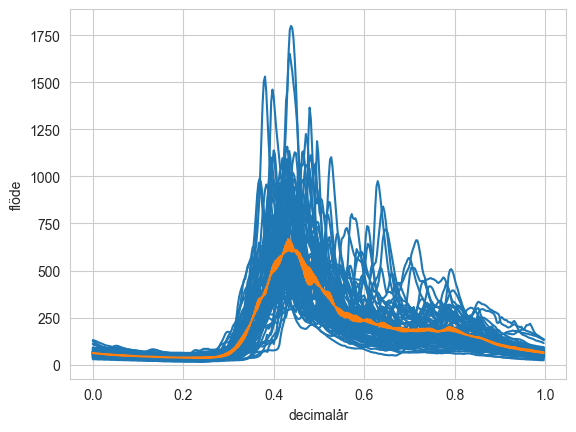

In [20]:
sns.lineplot(vindeln, x = "decimalår", y = "flöde", units = "år", estimator = None)
sns.lineplot(vindeln, x = "decimalår", y = "flöde")

**Uppgift:** Decimalår är (dagsnumret-1)/365 (eller 366 vid skottår). Ungefär när på året brukar vårfloden komma igång?

Låt oss definiera årstiden **sommar** som decimalår mellan 0.3 och 0.6, och skapa en ny variabel som är True när det är sommar och False annars.

In [21]:
vindeln["sommar"] = (vindeln["decimalår"] > 0.3) & (vindeln["decimalår"] < 0.6)
print(vindeln)

       decimalår    år  flöde  sommar
0       0.000000  1911     38   False
1       0.002740  1911     38   False
2       0.005479  1911     38   False
3       0.008219  1911     37   False
4       0.010959  1911     37   False
...          ...   ...    ...     ...
26293   0.986301  2022     64   False
26294   0.989041  2022     63   False
26295   0.991781  2022     63   False
26296   0.994521  2022     62   False
26297   0.997260  2022     62   False

[26298 rows x 4 columns]


## 3.1 Årstidssammanfattning
Vi kan beräkna sammanställningar för vardera gruppen genom att lägga till *.groupby()* innan vi gör *.describe()* och sedan lägga resultatet i en kolumn per grupp med *.transpose()*:

In [22]:
print(vindeln.groupby("sommar").flöde.describe().transpose())

sommar         False        True 
count   18378.000000  7920.000000
mean      106.030417   366.379293
std        86.809641   237.750858
min        15.000000    22.000000
25%        46.000000   198.750000
50%        74.000000   312.000000
75%       143.000000   489.000000
max       975.000000  1799.000000


**Mozquizto 5:** Beräkna några sammanfattande mått för flödet under de olika årstiderna.

## 3.2 Histogram
För att visuellt jämföra data mellan grupper kan vi rita med olika färg med **hue=**, baserat på **sommar**-variabelns värde.

<Axes: xlabel='flöde', ylabel='Count'>

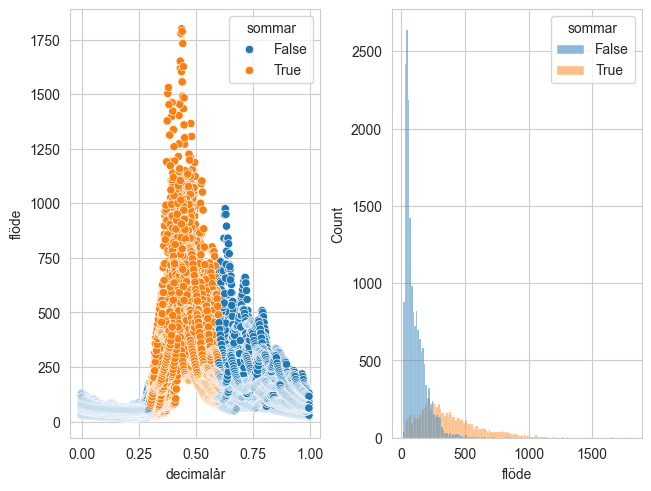

In [23]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.scatterplot(vindeln, x = "decimalår", y = "flöde", hue = "sommar", ax = axs[0])
sns.histplot(vindeln, x = "flöde", hue = "sommar", ax = axs[1])

Genom att använda *displot()* och **col** (column) istället för **hue** får vi två histogram bredvid varandra, pröva:

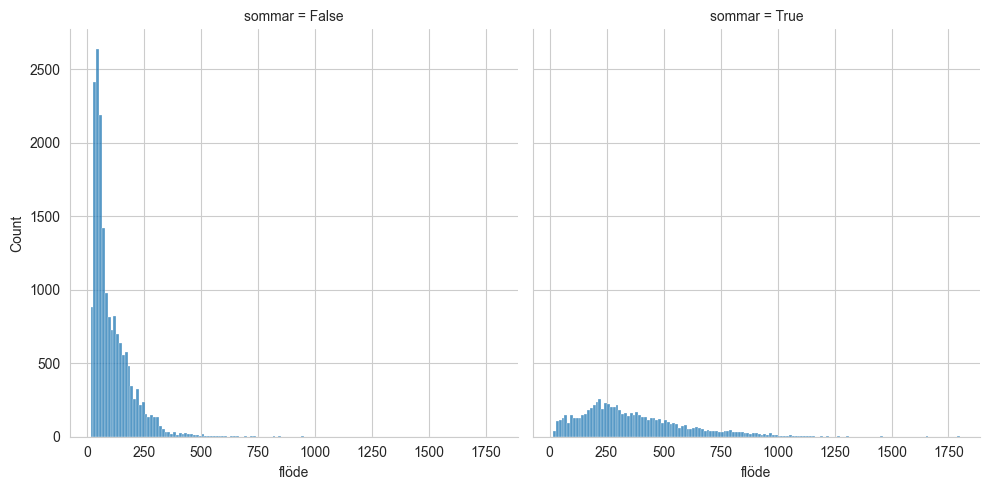

In [24]:
sns.displot(vindeln, x = "flöde", col = "sommar")

## 3.3 Boxplot och violinplot
Ett annat alternativ för att jämföra grupper är att använda *sns.boxplot()*.

<Axes: xlabel='sommar', ylabel='flöde'>

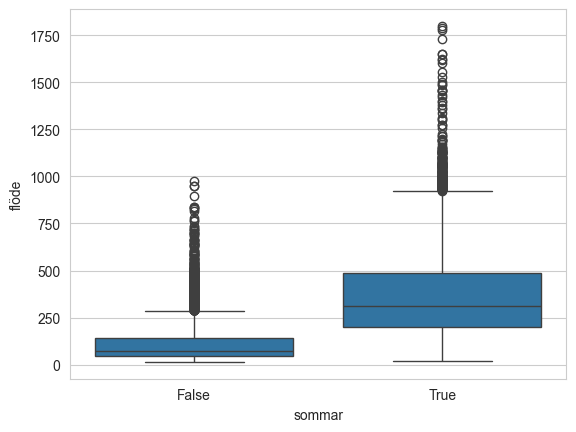

In [25]:
sns.boxplot(vindeln, x = "sommar", y = "flöde")

En boxplot definieras av minimum, undre kvartil, median, övre kvartil och maximum. De observationer som ligger längre än 1.5 gånger "lådans" höjd från lådans kant markeras som outliers.

**Uppgift:** Jämför boxplottarna med minimum, etc, från den uppdelade sammanställningen du gjorde tidigare.

Ett bättre alternativ till *sns.boxplot()* är ibland *sns.violinplot()* som är en kombination av utjämnat histogram och boxplot:

<Axes: xlabel='sommar', ylabel='flöde'>

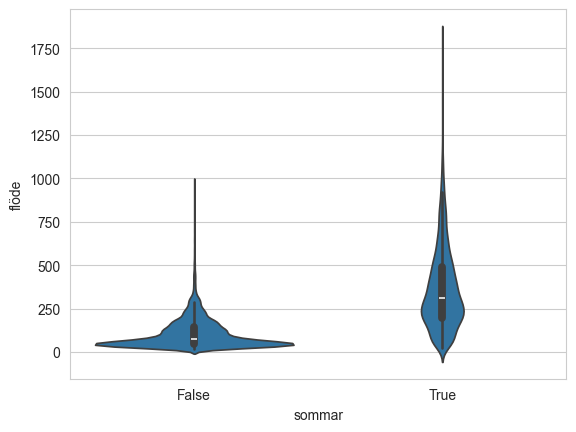

In [26]:
sns.violinplot(vindeln, x = "sommar", y = "flöde")

**Uppgift:** Jämför histogram och box-/violinplot. Är det skillnad i flöde mellan sommar och icke-sommar?

## 3.4 Empiriska täthets- och fördelningsfunktioner

Vi kan också rita utjämnade histogram och empiriska fördelningsfunktioner för de två årstiderna:

<Axes: xlabel='flöde', ylabel='Proportion'>

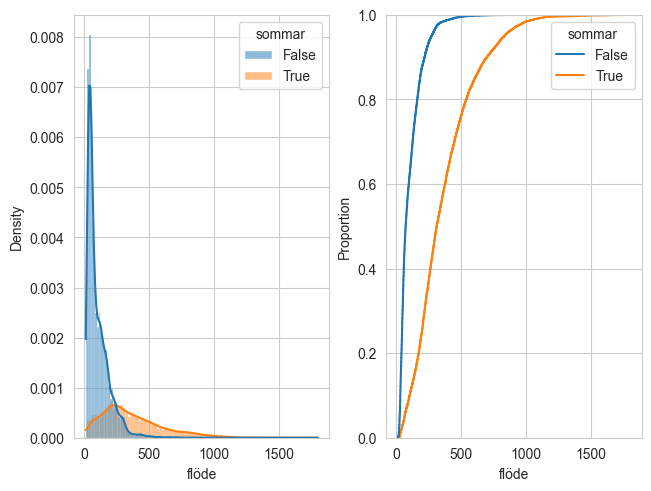

In [27]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
sns.histplot(vindeln, x = "flöde", stat = "density", hue = "sommar", kde = True, ax = axs[0])
sns.ecdfplot(vindeln, x = "flöde", hue = "sommar", ax = axs[1])

**Uppgift:** Ser det ut som det är samma fördelning under sommaren som övriga året?

# 4. Sommarflödena
Vi koncentrerar oss på sommarflödena och väljer ut dem med *.loc()*.

In [28]:
sommar = vindeln.loc[(vindeln["sommar"])]
print(sommar.describe())

         decimalår           år        flöde
count  7920.000000  7920.000000  7920.000000
mean      0.450377  1970.388889   366.379293
std       0.086942    38.855651   237.750858
min       0.300546  1911.000000    22.000000
25%       0.375342  1928.750000   198.750000
50%       0.450067  1986.500000   312.000000
75%       0.526027  2004.250000   489.000000
max       0.600000  2022.000000  1799.000000


Rita histogram och empirisk fördelningsfunktion för sommarflödena:

In [29]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.histplot(sommar, x = ?, stat = "density", kde = True, ax = axs[0])
sns.ecdfplot(sommar, x = ?, ax = axs[1])

SyntaxError: invalid syntax (1004008377.py, line 2)

**Uppgift:** Påminner histogrammet och fördelningsfunktionen om någon vanlig modell för stokastiska variabler?

## 4.1 Jämför med normalfördelning
Histogrammet och den empiriska fördelningsfunktionen kan jämföras med täthet- och fördelningsfunktioner för standardfördelningar för att undersöka om någon sådan passar som modell för data.

Vi ska nu jämföra histogrammet med täthetsfunktionen för en normalfördelning och den empiriska fördelningsfunktionen med fördelningsfunktionen för en normalfördelning. För det använder vi funktionen *norm* från **stats**.
Ta först reda på hur funktionen fungerar:


In [ ]:
help(stats.norm)

**Uppgift:** För att beräkna funktionerna för normalfördelningen behöver vi uppskattningar av parametrarna i fördelningen.  Det kan vi göra med stickprovsmedelvärdet och stickprovsstandardavvikelsen för flödet. Använd att en **pandas dataframe** har funktioner för **mean** och **std**. 

Spara värdena i objekten **my** och **sigma**. De behövs senare.
För att kunna beräkna normalfördelningsfunktionerna behöver vi medelvärde och standardavvikelse.

In [ ]:
my = sommar.flöde.?()
sigma = sommar.flöde.?()
print("medelvärde=", my)
print("standardavvikelse=", sigma)


Nu kan vi lägga till normalfördelningen till figuren:

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.histplot(sommar, x = "flöde", stat = "density", kde = True, ax = axs[0])
sns.ecdfplot(sommar, x = "flöde", ax = axs[1])

#konstruera en vektor med 100 värden från 0 till största flöde (för att få snygga värden)
x = np.linspace(0, max(vindeln.flöde), 100)

#beräkna normaltäthet med de skattade parametrarna
p_normal = stats.norm.pdf(x, my, sigma)
#och fördelningsfunktion med de skattade parametrarna
F_normal = stats.norm.cdf(x, my, sigma)

#addera dessa till figuren
axs[0].plot(x, p_normal, 'r')
axs[1].plot(x, F_normal, 'r')

**Uppgift:** Ser det ut som om det passar bra med normalfördelning?

## 4.2 Fördelningspapper (QQ-plot)

Ett alternativ är att jämföra empiriska och teoretiska kvantiler för de justerade flödena. Om vi har rätt fördelningsantagande bör dessa ligga på en rät linje.

Det görs med funktionen *probplot()* . Här anger **dist=** vilken fördelning vi är intresserade av, **fit = True** att den räta linjen ska läggas till och **plot = plt** att **matlibplot** ska användas för att rita.

### 4.2.1 Normalfördelning

Ett alternativ är att jämföra empiriska och teoretiska kvantiler för de justerade flödena. Om vi har rätt fördelningsantagande bör dessa ligga på en rät linje.

Här anger **dist = "norm"** att vi är intresserade av en normalfördelning.

In [ ]:
stats.probplot(sommar.flöde, dist = "norm", fit = True, plot = plt)
plt.title("Sommar: Normalfördelning")

**Uppgift:** Ser det ut att passa med normalfördelning?

### 4.2.2 Gumbelfördelning

Gumbelfördelningen, se extramaterialet, har fördelningsfunktion

$F_X(x)=e^{-e^{(x-\text{loc})/\text{scale}}}$ för $-\infty < x < \infty$

med en lägesparameter $\text{loc}$ och en skalparameter $\text{scale}$. Python har två varianter där vi ska använda varianten *gumbel_r()* (**r**ight) som passar för extrema maxvärden. Det finns en omvänd variant *gumbel_l()* (**l**eft) som passar bättre för extrema minimivärden. (Testa gärna den också för att se hur dåligt det blir.)


In [41]:
loc_gumb, scale_gumb = stats.gumbel_r.fit(sommar.flöde)
print("Gumbel: Lägesparameter =", loc_gumb, ", Skalparameter =", scale_gumb)

Gumbel: Lägesparameter = 260.82389316547176 , Skalparameter = 175.91100188391164


**Mozquizto 6:** Ange parametrarna i Gumbelfördelningen.

Rita ett Gumbelpapper:

Text(0.5, 1.0, 'Gumbelfördelning')

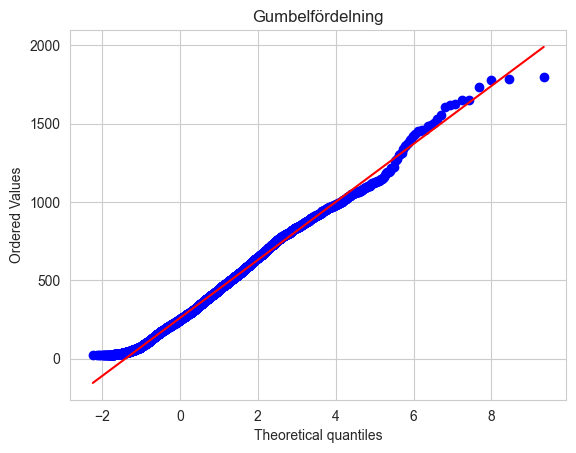

In [40]:
stats.probplot(sommar.flöde, dist = stats.gumbel_r, fit = True, plot = plt)
plt.title("Gumbelfördelning")

**Uppgift:** Ser det ut att passa med Gumbelfördelning?

### 4.2.3 Exponentialfördelning

Vi kan också jämföra data med exponentialfördelning. Då behöver vi använda *stats.expon()* eftersom den inte ingår som standard. Exponentialfördelningen har fördelningsfunktionen

$F_(x) = 1-e^{-\lambda x} = 1-e^{-x/\mu}$ för $x \geq 0$, enligt Vännman & Jonsson.

Fördelningar som bara antar icke-negativa värden, $x \geq 0$, kan generaliseras och flyttas så att de istället antar alla värden $x \geq \text{loc}$, där $\text{loc}$ (**loc**ation) är en lägesparameter som används för att förskjuta fördelning i sidled utan att ändra formen. Det gäller t.ex. exponentialfördelningen där Python använder fördelningsfunktionen

$F_X(x) = 1-e^{-(x-\text{loc})/\text{scale}}$ för $x \geq \text{loc}$

där $\text{loc}$ är en lägesparameter och $\text{scale}$ är en skalparameter. Om $\text{loc}=0$ får man den vanliga exponentialfördelningen med $\text{scale} = \mu = 1/\lambda$.

Eftersom Vindelälven inte har varit bottenfrusen någon gång under den period vi har mätningar från så är det alltid ett litet flöde även under kalla vintrar. Det är alltså rimligt att det kan behövas en lägesparameter till denna typ av data. 

Funktionen *stats.expon.fit()* beräknar läges- och skalparametrarna (i den ordningen).

Skatta läges- och skalparameter för sommarflödena:

In [39]:
loc_exp, scale_exp = stats.expon.fit(sommar.flöde)
print("Lägesparameter =", loc_exp)
print("Skalparameter =", scale_exp)

Lägesparameter = 22.0
Skalparameter = 344.37929292929294


**Uppgift:** Känner du igen värdet på lägesparametern? Verkar det rimligt?

**Uppgift:** Hur stor är skillnaden mellan medelflödet **my** och skalparametern? Är det också rimligt?

Vi kan också tvinga lägesparametern till noll, dvs en vanlig exponentialfördelning, med **floc=0**:

In [38]:
loc_exp0, scale_exp0 = stats.expon.fit(sommar.flöde, floc = 0)
print("Lägesparameter =", loc_exp0)
print("Skalparameter =", scale_exp0)

Lägesparameter = 0.0
Skalparameter = 366.37929292929294


**Uppgift:** Känner du igen värdet på skalparametern?

Låt oss rita fördelningspapper för båda varianterna. Vi anger vad parametrarna ska vara med **sparams=**:

NameError: name 'loc_exp0' is not defined

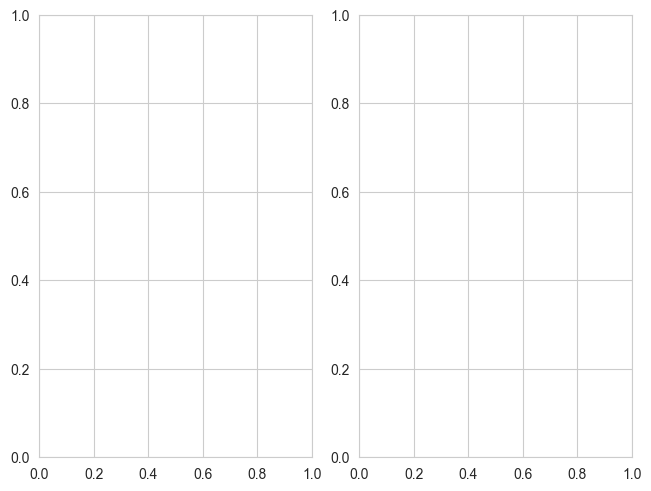

In [37]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
stats.probplot(sommar.flöde, dist = stats.expon, sparams = (loc_exp0, scale_exp0), fit = True, plot = axs[0])
stats.probplot(sommar.flöde, dist = stats.expon, sparams = (loc_exp, scale_exp), fit = True, plot = axs[1])
axs[0].set_title("Exponential utan lägesparameter")
axs[1].set_title("Exponential med lägesparameter")

**Uppgift:** Ser det ut att passa med exponentialfördelning?

### 4.2.4 Lognormalfördelning?

En slumpvariabel $X$ är lognormalfördelad om logaritmen av den, $Y=\ln(X)$, är normalfördelad. dvs $Y=\ln(X) \in N(\mu,\sigma)$, se extramaterialet.
Python använder istället en variant där $\ln(X-\text{loc}) \in N(\mu,\sigma)$ med en extra lägesparameter. Modellen används ofta inom hydrologi så den kanske passar för vattenflöden.

Vi låter Python uppskatta alla parametrarna. De kommer i annan ordning än för exponentialfördelningen så vi samlar dem i ett objekt och försöker ta reda på vad som är vad:

In [ ]:
param_logn = stats.lognorm.fit(sommar.flöde)
print("Lognormal: ", param_logn)

Den extra lägesparametern är det andra värdet, som bör vara ganska stort och negativt. Det innebär att för att det ska bli normalfördelat när vi logaritmerar måste vi först addera (dvs subtrahera något negativt) ganska mycket. Vi kan tvinga lägesparametern till noll istället med **floc=0**:

In [ ]:
param_logn0 = stats.lognorm.fit(sommar.flöde, floc = 0)
print("Lognormal: ", param_logn0)

**Uppgift:** Beräkna medelvärde $\bar{y}$ och standardavvikelse $s$ för de logaritmerade flödena. Vi använder **numpy**-funktionerna eftersom vi först behöver logaritmera. Beräkna också $e^{\bar{y}}$. Vad är det som finns på de olika ställena i **param_logn0**? 

In [ ]:
m_y = np.?(np.log(sommar.flöde))
s_y = np.?(np.log(sommar.flöde))
print("Ymedel = ", m_y)
print("Ystdavv = ", s_y)
print("exp(Ymedel) =", np.exp(m_y))


För att kunna rita fördelningspappret för lognormalfördelningen behöver vi ange parametervärdena med **sparams=** eftersom det är för komplicerat för *probplot()* att räkna ut dem själv.

Vi ritar både varianten med $\text{loc}=0$ och när $\text{loc}$ inte är fixerad och ser om det gör någon skillnad på hur bra fördelningen passar.

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
stats.probplot(sommar.flöde, dist = stats.lognorm, sparams = param_logn0, fit = True, plot = axs[0])
stats.probplot(sommar.flöde, dist = stats.lognorm, sparams = param_logn, fit = True, plot = axs[1])
axs[0].set_title("Lognormal utan lägesparameter")
axs[1].set_title("Lognormal med lägesparameter")


**Uppgift:** Gjorde lägesparametern någon nytta för anpassningen?

**Uppgift:** Ser det ut att passa med lognormalfördelning?

### 4.2.5 Weibullfördelning?

Weibullfördelningen har fördelningsfunktion

$F_X(x)=1-e^{-x^\beta/\alpha}$ för $x \geq 0$ i Vännman & Jonsson.

Pythonfunktionen *weibull_min()* använder istället varianten

$F_X(x) = 1 - e^{-(\frac{x-\text{loc}}{\text{scale}})^\text{shape}}$ för $x \geq \text{loc}$

med en lägesparameter $\text{loc}$, en skalparameter $\text{scale}$ och en formparameter $\text{shape}$. Om $\text{loc}=0$ har vi sambanden $\beta = \text{shape}$ och $\alpha = \text{scale}^{\text{shape}}$. Om $\text{shape}=1$ har vi en (förskjuten) exponentialfördelning.

Det finns också en *weibull_max()* som är fördelningen för $-X$.

Parametrarna behöver uppskattas med *stats.weibull_min.fit()* innan vi kan rita fördelningspappret. De kommer i följande ordning: $\text{shape}$, $\text{loc}$, $\text{scale}$. Vi skattar båda varianterna:

In [44]:
shape_wbl, loc_wbl, scale_wbl = stats.weibull_min.fit(sommar.flöde)
print("Form =", shape_wbl, ", Läge =", loc_wbl, ", Skala =", scale_wbl)
shape_wbl0, loc_wbl0, scale_wbl0 = stats.weibull_min.fit(sommar.flöde, floc=0)
print("Form =", shape_wbl0, ", Läge =", loc_wbl0, ", Skala =", scale_wbl0)


Form = 1.4768077313202685 , Läge = 20.242348535218284 , Skala = 382.297498704758
Form = 1.6093386998429788 , Läge = 0 , Skala = 409.83828177702003


Text(0.5, 1.0, 'Weibullfördelning utan lägesparameter')

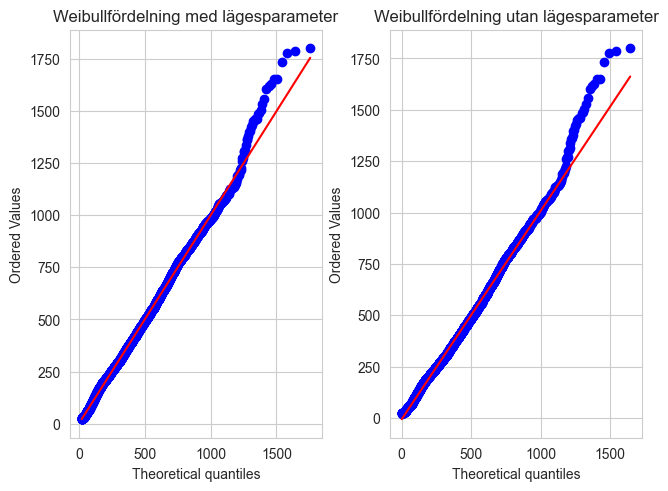

In [45]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
stats.probplot(sommar.flöde, dist = stats.weibull_min, 
               sparams = (shape_wbl, loc_wbl, scale_wbl), fit = True, plot = axs[0])
stats.probplot(sommar.flöde, dist = stats.weibull_min, 
               sparams = (shape_wbl0, loc_wbl0, scale_wbl0), fit = True, plot = axs[1])
axs[0].set_title("Weibullfördelning med lägesparameter")
axs[1].set_title("Weibullfördelning utan lägesparameter")


**Uppgift:** Gjorde lägesparametern någon nytta för anpassningen?

**Mozquizto 7:** Ange parametrarna för den bäst anpassade Weibullfördelningen.

**Uppgift:** Verkar det passa med Weibullfördelning?

## 4.3 Bästa modellen

Vilken teoretisk fördelning som är bäst beror lite på vad man ska använda den till. Om man vill uppskatta hur låga flödena är under torra somrar är det viktigt att fördelningen passar bra till de låga värdena. Om man istället vill uppskatta hur höga flödena är under våta somrar behöver fördelningen passa bra till de höga värdena.

**Mozquizto 8:** Vilken av fördelningarna passar bäst till de höga sommarflödena?

**Mozquizto 9:** Vilken av fördelningarna passar bäst till de låga sommarflödena?

**Uppgift:** Beräkna täthets- och fördelningsfunktion för både Gumbel och Weibull-fördelningen och lägg till dem i plottarna.

In [34]:
help(stats.weibull_min)

Help on weibull_min_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.weibull_min_gen object>
    Weibull minimum continuous random variable.
    
    The Weibull Minimum Extreme Value distribution, from extreme value theory
    (Fisher-Gnedenko theorem), is also often simply called the Weibull
    distribution. It arises as the limiting distribution of the rescaled
    minimum of iid random variables.
    
    As an instance of the `rv_continuous` class, `weibull_min` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(c, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, c, loc=0, scale=1)
        Probability density function.
    logpdf(x, c, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, c, loc=0, scale=1)
        Cumulative distribution functio

NameError: name 'x' is not defined

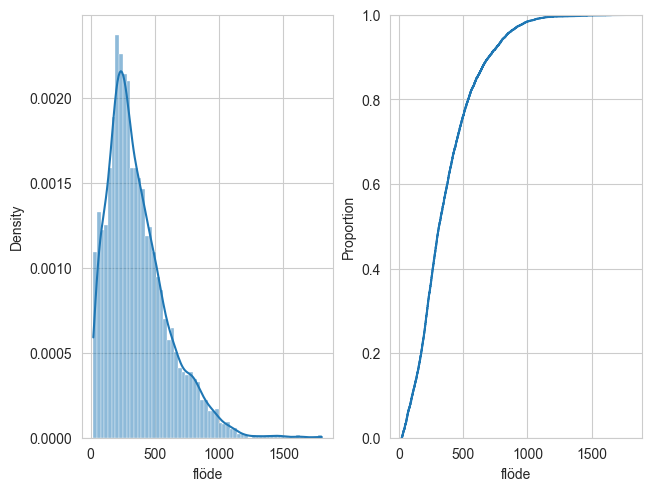

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout = True)
sns.histplot(sommar, x = "flöde", stat = "density", kde = True, ax = axs[0])
sns.ecdfplot(sommar, x = "flöde", ax = axs[1])

#beräkna weibulltäthet med de skattade parametrarna
p_wbl = stats.weibull_min.pdf(x, shape_wbl, loc_wbl, scale_wbl)
p_gumb = stats.gumbel_r.pdf(x, loc_gumb, scale_gumb)
#och fördelningsfunktion med de skattade parametrarna
F_wbl = stats.weibull_min.cdf(x, shape_wbl, loc_wbl, scale_wbl)
F_gumb= stats.gumbel_r.cdf(x, loc_gumb, scale_gumb)

#addera dessa till figuren
axs[0].plot(x, p_wbl, 'r')
axs[0].plot(x, p_gumb, 'b')
axs[1].plot(x, F_wbl, 'r')
axs[1].plot(x, F_gumb, 'b')


**Uppgift:** Ser det bra ut?

### 4.3.1 Sannolikheter

**Mozquizto 10:** Beräkna den observerade sannolikheten att sommarflödet överstiger $x$ och jämför med motsvarande sannolikhet enligt den bästa modellen för de höga, alternativt låga, flödena.


In [46]:
gräns = 900
F_gräns_wbl = stats.weibull_min.cdf(gräns, shape_wbl, loc_wbl, scale_wbl)
F_gräns_gumb = stats.gumbel_r.cdf(gräns, loc_gumb, scale_gumb)

print("Observerad andel >", gräns, "=", np.mean(sommar.flöde > gräns))
print("Weibull:", F_gräns_wbl)
print("Gumbel:", F_gräns_gumb)

Observerad andel > 900 = 0.03232323232323232
Weibull: 0.967421731001896
Gumbel: 0.9739230164287812



### 4.3.2 Kvantiler
Teoretiska kvantiler i en fördelning fås med hjälp av inversen av fördelningsfunktionen *stats.fördelningsnamn.ppf()* **p**ercent **p**oint **f**unction.

**Mozquizto 11:** Beräkna både den empiriska och den teoretiska $\alpha$-kvantilen för de höga, alternativt låga, sommarflödena.

In [48]:
alfa = 0.05
print("Observerad kvantil:", np.quantile(sommar.flöde, 1-alfa))
print("Weibull:", stats.weibull_min.ppf(1-alfa, shape_wbl, loc_wbl, scale_wbl))
print("Gumbel:", stats.gumbel_r.ppf(1-alfa, loc_gumb, scale_gumb))

Observerad kvantil: 832.0
Weibull: 823.877442972766
Gumbel: 783.3139152153132


**Uppgift:** Verkar modellerna ge rimliga resultat?

**Slut på Datorövning 1**
